In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score
from scipy import optimize

fullDS = pd.read_csv('sharpeDS.csv')
fullDS = fullDS[fullDS['date'] == '2020-01-01']
fullDS = fullDS.nlargest(200, ['adjclose'])
(fullDS.ticker).to_csv('top200_jan1.txt', index=False)

In [3]:
#import yahoo_fin.stock_info as si
import yahoo_fin.stock_info as si

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from io import BytesIO

with open("top200_jan1.txt") as file:
    lines = file.readlines()
    companyList = [line.rstrip() for line in lines]

print(companyList)
stockData = {}

# writer = pd.ExcelWriter('/path_to_save/output.xlsx')
sum_df=pd.DataFrame()

for ticker in companyList:
    try:
        stockData[ticker] = si.get_data(ticker, start_date="01/01/2020", end_date="02/01/2020", interval="1d")
        sum_df = sum_df.append(stockData[ticker])
    except:
        continue


['SPY', 'NVR', 'AMZN', 'BKNG', 'GOOG', 'GOOGL', 'AZO', 'CMG', 'MTD', 'TDG', 'EQIX', 'CHTR', 'BLK', 'LMT', 'ORLY', 'ROP', 'TFX', 'TDY', 'NOC', 'BIO', 'ADBE', 'MKTX', 'COO', 'NFLX', 'NOW', 'REGN', 'HUM', 'TYL', 'PAYC', 'BA', 'FLT', 'SPY', 'SPY', 'SPY', 'MA', 'TMO', 'GWW', 'COST', 'ESS', 'LRCX', 'ILMN', 'SPGI', 'AVGO', 'MSCI', 'DPZ', 'INTU', 'ANSS', 'CTAS', 'IDXX', 'BIIB', 'BDX', 'ULTA', 'UNH', 'RE', 'MLM', 'ANTM', 'ALGN', 'MCO', 'HII', 'SBAC', 'DXCM', 'SIVB', 'ZBRA', 'APD', 'GS', 'VRTX', 'AMT', 'WAT', 'ANET', 'HD', 'AON', 'POOL', 'LHX', 'PSA', 'TECH', 'VRSN', 'CME', 'SYK', 'WLTW', 'AMGN', 'MCD', 'AVB', 'FB', 'NSC', 'ACN', 'LIN', 'V', 'ADSK', 'GPN', 'ECL', 'EL', 'PH', 'CI', 'ISRG', 'ABMD', 'ROK', 'STZ', 'SHW', 'CRM', 'LH', 'UNP', 'MSI', 'MPWR', 'ITW', 'MSFT', 'HON', 'GD', 'KSU', 'ADP', 'KLAC', 'IT', 'VRSK', 'IEX', 'DHR', 'AMP', 'MTB', 'RMD', 'ARE', 'IQV', 'WST', 'SWK', 'DE', 'CRL', 'CMI', 'SNA', 'CLX', 'SRE', 'DG', 'HSY', 'MMM', 'STE', 'EFX', 'SNPS', 'JKHY', 'CB', 'ZBH', 'JNJ', 'CCI', 'FD

In [4]:
sum_df.to_csv('top200_jan2020.csv')

# Data Visualization

In [5]:

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

In [24]:
full_DS = pd.read_csv('top200_jan2020.csv')
full_DS.columns = ['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker']
full_DS
#sum_df.columns = ['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker']

,date,open,high,low,close,adjclose,volume,ticker
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,316.836670,59151200,SPY
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,314.437500,77709700,SPY
2,2020-01-06,320.489990,323.730011,320.359985,323.640015,315.637115,55653900,SPY
3,2020-01-07,323.019989,323.540009,322.239990,322.730011,314.749573,40496400,SPY
4,2020-01-08,322.940002,325.779999,322.670013,324.450012,316.427063,68296000,SPY
...,...,...,...,...,...,...,...,...
4174,2020-01-27,114.070000,115.500000,113.500000,114.849998,113.958771,2677900,ROST
4175,2020-01-28,115.110001,115.470001,114.360001,114.480003,113.591637,1558400,ROST
4176,2020-01-29,114.730003,115.419998,113.959999,114.269997,113.383263,1365900,ROST
4177,2020-01-30,113.480003,114.660004,113.059998,114.180000,113.293968,1627100,ROST


Text(0, 0.5, 'adjclose')

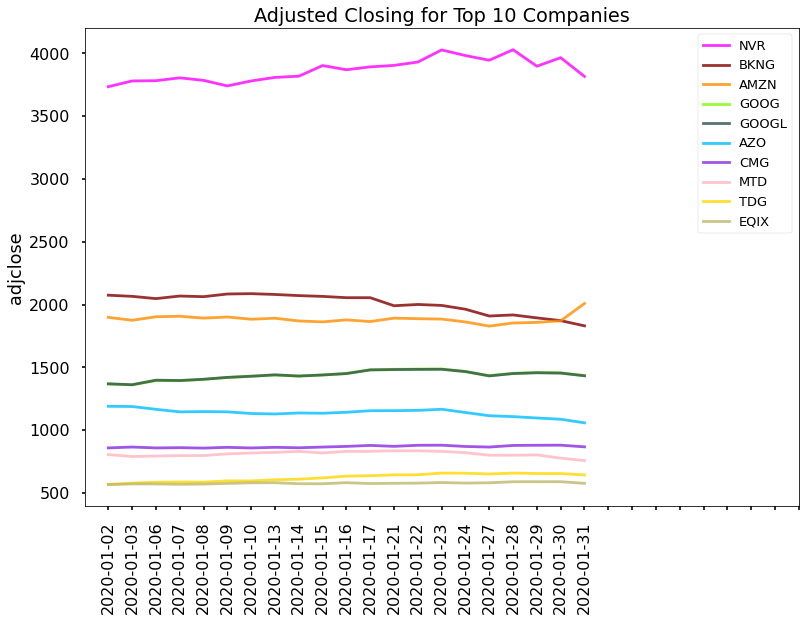

In [31]:
full_DS = full_DS.dropna()
avg_monthly_returns = full_DS.groupby('ticker')['adjclose'].agg(np.mean)
top10 = avg_monthly_returns.nlargest(n=10)
colorList = colorList=["fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki"]
i=0
for comp in (top10.index):    
  plt.plot(full_DS[full_DS['ticker'] == comp].date, full_DS[full_DS['ticker'] == comp].adjclose, label = comp, alpha=.8, color=colorList[i])
  i += 1

plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 30, 1),rotation=90)
plt.title('Adjusted Closing for Top 10 Companies')
plt.ylabel('adjclose')

In [54]:
# Remove S&P Index from the dataset and fill in missing companies.
# Only the most recent several dates have all 500 companies, so we fill in all months
# with all the 500 current S&P companies
company_DS = full_DS[full_DS['ticker'] != "SPY"]    #removing S&P Index from ds
company_DS['return'] = (company_DS['close'] - company_DS['open']) / company_DS['open']

#master list of 200 companies (first day)
master_name_list = company_DS[company_DS.date == "2020-01-02"].ticker   
master_name_set = set(master_name_list)

# for each dat in the dataset,
for group_name, df_month in company_DS.groupby(pd.Grouper(key='date')):
  # add any companies that are in the master list 500 but arent in the current group
  name_difference = master_name_set.difference(set(df_month.ticker))

  for xtra in name_difference:
    company_DS = company_DS.append({'ticker': xtra, 'date': group_name, 'return': -100}, ignore_index=True)

#organize DS by ascending date, and within each date by alphabetical company
company_DS = company_DS.sort_values(by = ['date', 'ticker'])


195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195


/var/folders/2v/m85hwzhn4pj_mf2pt28stvkc0000gq/T/ipykernel_65296/1481514140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_DS['return'] = (company_DS['close'] - company_DS['open']) / company_DS['open']


,date,open,high,low,close,adjclose,volume,ticker,return
3318,2020-01-02,160.470001,160.949997,157.529999,159.410004,155.478271,944900,AAP,-0.006606
1953,2020-01-02,172.509995,173.860001,167.139999,168.809998,168.809998,742600,ABMD,-0.021448
1743,2020-01-02,210.860001,211.919998,208.809998,210.149994,203.776108,2431100,ACN,-0.003367
420,2020-01-02,330.000000,334.480011,329.170013,334.429993,334.429993,1990100,ADBE,0.013424
2226,2020-01-02,171.960007,172.000000,169.199997,170.320007,164.650070,1364600,ADP,-0.009537
...,...,...,...,...,...,...,...,...,...
2477,2020-01-31,157.080002,157.509995,155.070007,155.949997,155.236343,567900,WST,-0.007194
3590,2020-01-31,124.720001,126.620003,123.550003,126.160004,125.110161,2379900,WYNN,0.011546
2813,2020-01-31,145.844666,147.174759,142.504852,143.592239,141.477234,1449931,ZBH,-0.015444
1322,2020-01-31,245.500000,246.279999,238.860001,239.020004,239.020004,335900,ZBRA,-0.026395


In [98]:
# Write Sharpe ratio function - Ben
# Sharpe ratio should be negativized - all optimization functions are written to minimize,
# so if we want to MAXIMIZE sharpe, then we need to minimize negative sharpe
def negative_sharpe_ratio(periodic_weights, periodic_returns, periodic_riskfree):
  """ 
    periodic_returns - dataframe containing the daily / monthly periodic returns (end of period - start of period) / start of period prices for multiple periods
    periodic_weights - weight vector for multiple periods each weight vector should sum to 1
    periodic_riskfree - risk free ratio
  """
  #print(periodic_returns)
  #print(type(periodic_returns))
  mark_returns = np.multiply(periodic_weights, periodic_returns)#[np.dot(periodic_weights[i], periodic_returns.iloc[i]) for i in range(periodic_returns.size)]
  risk_rate = periodic_riskfree

  er, sd = np.average(mark_returns), np.std(mark_returns)

  monthly_sharpe_ratio = (er - np.average(risk_rate)) / sd
  #print(er, sd, np.average(risk_rate))
  #print(monthly_sharpe_ratio)

  annualized_sharpe_ratio = (8.279)**(1/2) * monthly_sharpe_ratio
  return -1 *  monthly_sharpe_ratio



In [99]:
# Honestly not sure, but constrains the minimization function to only allow
# the weight vector to add up to one
def constraint(x):
    A= np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal

class MarkowitzModel():
    # currently initiates weight vectors so that all assets are weighted equally
    def __init__(self, num_assets, risk_free):
        self.winit = np.repeat(1.0/num_assets, num_assets)
        self.risk_free = risk_free
        
    # all values in weight vector must be between 0 and 1
    def bounds(self):
        return tuple([(0,1) for x in self.winit])

    def maximize(self, periodic_returns): 
        cons = ({'type': 'eq', 'fun':constraint})
        opt = optimize.minimize(negative_sharpe_ratio, x0 = self.winit, args = \
                                (periodic_returns, self.risk_free), method = 'SLSQP', 
                                 bounds = self.bounds(), constraints = cons, tol = 10**-3)
        return opt.x


In [100]:
NUM_ASSETS = 195
RISK_FREE = 0.0
model = MarkowitzModel(NUM_ASSETS, np.repeat(RISK_FREE, NUM_ASSETS))
weights = []

index = 0
# for each month in our full DS
for group_name, df_month in company_DS.groupby(pd.Grouper(key='date')):
  # find optimal weight distribution of alphabetically ordered companies.
  res = model.maximize(df_month['return'])
  weights.append(res)
  
  print(index)
  index+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [101]:
dates = company_DS['date'].unique()
print(len(weights[0]))
print(len(company_DS[company_DS.date == dates[0]]['return']))
returns = [np.dot(weights[i], company_DS[company_DS.date == dates[i]]['return']) for i in range(len(weights))]
print(returns)

195
195
[0.002973960900523126, 0.007309361278526034, 0.004235009429713935, 0.002294726153107963, 0.0031249466153115218, 0.003387876383194024, 0.0022064199147809297, 0.005146836640113109, 0.003645203851417362, 0.0037327439182175855, 0.003395620896594935, 0.0025103636256595344, 0.004633531057762964, 0.001769998907512659, 0.004851905524835341, 0.004743658888223253, 0.003401368162147014, 0.003624677556635338, 0.001989013718621086, 0.006382934297501821, 0.005436992707371876]


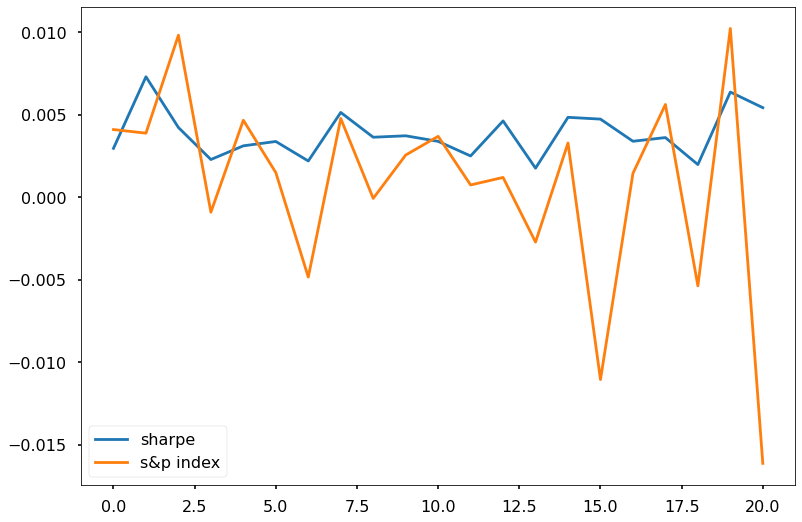

In [102]:
spindex = pd.read_csv('top200_jan2020.csv')

spindex = spindex[spindex['ticker'] == 'SPY']
spindex.columns = ['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker']

spindex = spindex.drop_duplicates(subset=['date'])
spindex['return'] = (spindex['close'] - spindex['open']) / spindex['open']
plt.plot(returns, label="sharpe")
plt.plot(spindex['return'].values, label="s&p index")
plt.legend()
plt.show()


In [103]:
iter = 0
sharpe_avg = 0
for group_name, df_month in company_DS.groupby(pd.Grouper(key='date')):
  sharpe = -1 * negative_sharpe_ratio(weights[iter], df_month['return'], np.repeat(RISK_FREE, NUM_ASSETS) )
  sharpe_avg += sharpe
  iter+=1
  
print("avg sharpe: ", sharpe_avg / iter)

avg sharpe:  1.201637371168815


0.022513593128410107
0.016624590136993092


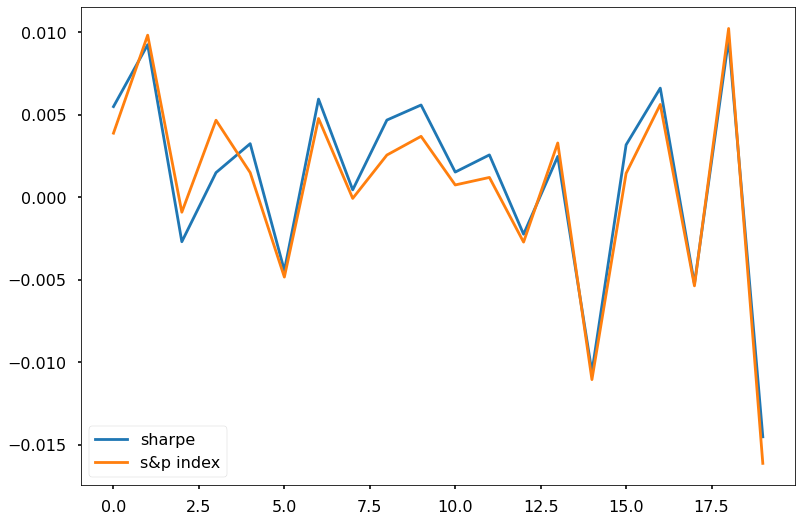

In [105]:
dates = company_DS['date'].unique()
offset_returns = [np.dot(weights[i], company_DS[company_DS.date == dates[i+1]]['return']) for i in range(len(dates) - 1)]

print(np.sum(offset_returns))
print(np.sum(spindex['return']))


plt.plot(offset_returns, label="sharpe")
plt.plot(spindex['return'].values[1:], label="s&p index")
plt.legend()
plt.show()

In [106]:
sharpe_avg = 0
for i in range( len(offset_returns)-1):
  sharpe = -1 * negative_sharpe_ratio(weights[i], company_DS[company_DS.date == dates[i+1]]['return'],np.zeros(NUM_ASSETS) )
  sharpe_avg += sharpe
  iter+=1
  
sharpe_avg/(len(offset_returns) - 1)

0.07931212338828493